In [35]:
import requests
from bs4 import BeautifulSoup

requests = requests.get('https://gist.github.com/curran/a08a1080b88344b0c8a7')

soup = BeautifulSoup(requests.content, 'html.parser')
print(soup.prettify())


<!DOCTYPE html>
<html data-a11y-animated-images="system" data-a11y-link-underlines="true" data-color-mode="auto" data-dark-theme="dark" data-light-theme="light" lang="en">
 <head>
  <meta charset="utf-8"/>
  <link href="https://github.githubassets.com" rel="dns-prefetch"/>
  <link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
  <link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
  <link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
  <link crossorigin="" href="https://github.githubassets.com" rel="preconnect"/>
  <link href="https://avatars.githubusercontent.com" rel="preconnect"/>
  <link crossorigin="anonymous" href="https://github.githubassets.com/assets/light-605318cbe3a1.css" media="all" rel="stylesheet">
   <link crossorigin="anonymous" href="https://github.githubassets.com/assets/dark-bd1cb5575fff.css" media="all" rel="stylesheet">
    <link crossorigin="anonymous" data-color-theme="dark_dimmed" data-href="https://

In [36]:
import re
def extract_iris_data(html_content):
    iris_data = []
    pattern = r'<td>\s*([\d.]+)\s*</td>\s*' * 4 + r'<td>\s*(\w+)\s*</td>'
    
    matches = re.finditer(pattern, html_content)
    
    for match in matches:
        iris_entry = {
            'sepal_length': float(match.group(1)),
            'sepal_width': float(match.group(2)),
            'petal_length': float(match.group(3)),
            'petal_width': float(match.group(4)),
            'species': match.group(5)
        }
        iris_data.append(iris_entry)
    
    return iris_data

irish_data = extract_iris_data(soup.prettify())

In [37]:
import pandas as pd
data_frame = pd.DataFrame(irish_data)

print("data_frame.shape",data_frame.shape)
data_frame

data_frame.shape (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [38]:
data_columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
data_frame.columns = data_columns
data_frame

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [39]:
data_frame.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [40]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Need to check for missing values


In [41]:
data_frame.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

So we don't have any missing values in the data, that is actually good


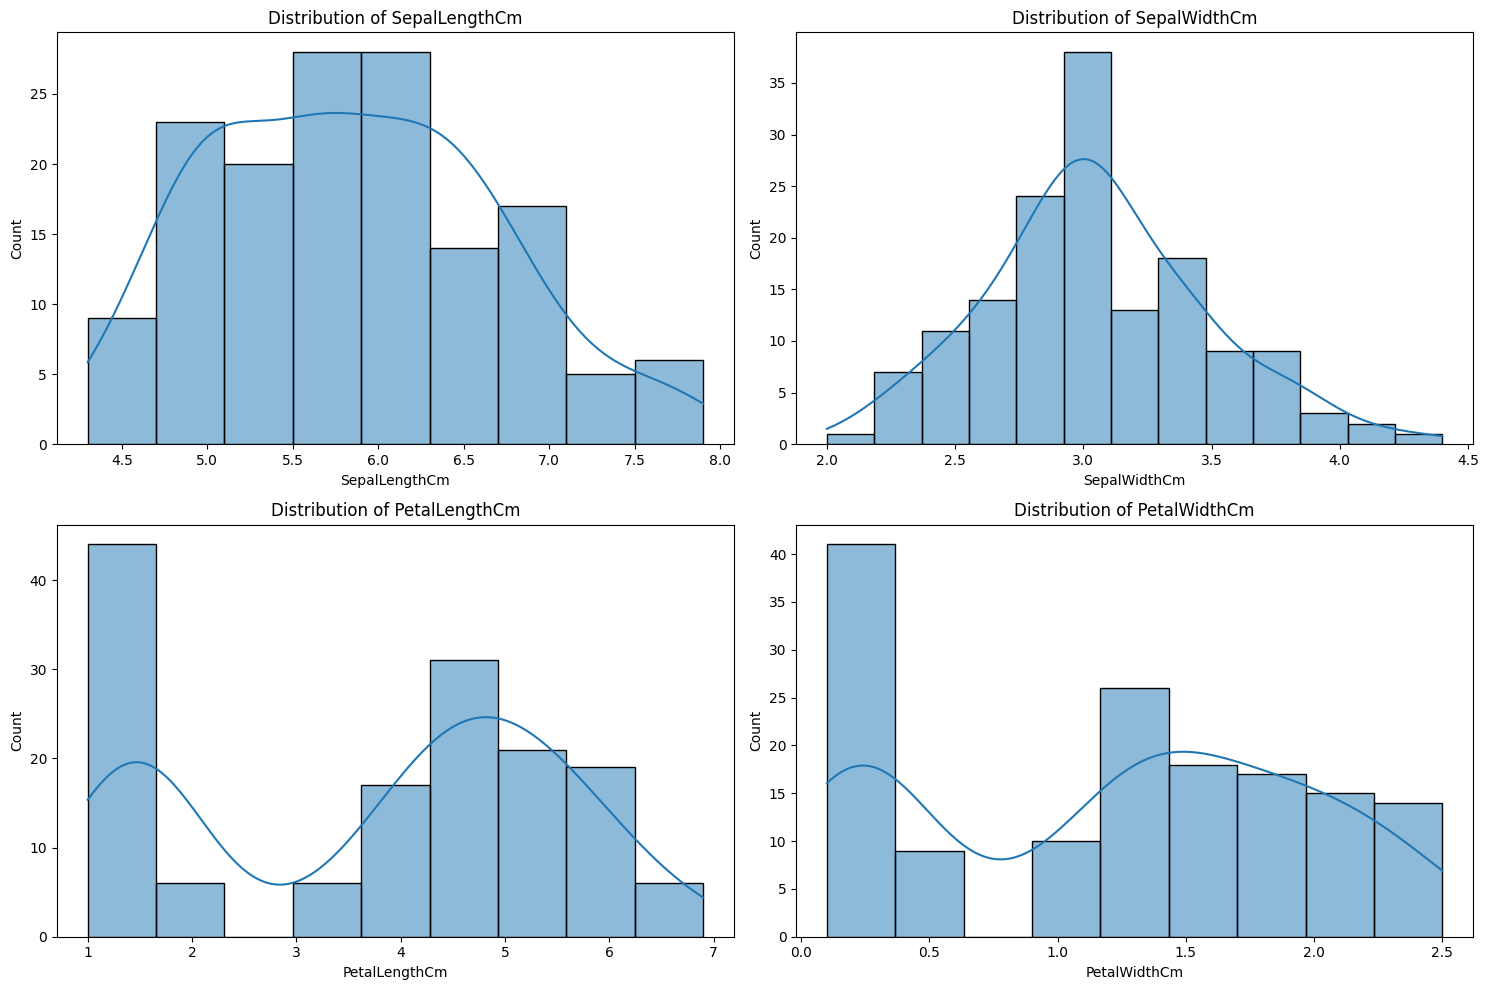

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

for i, column in enumerate(['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']):
    plt.subplot(2, 2, i+1)
    
    sns.histplot(data=data_frame, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

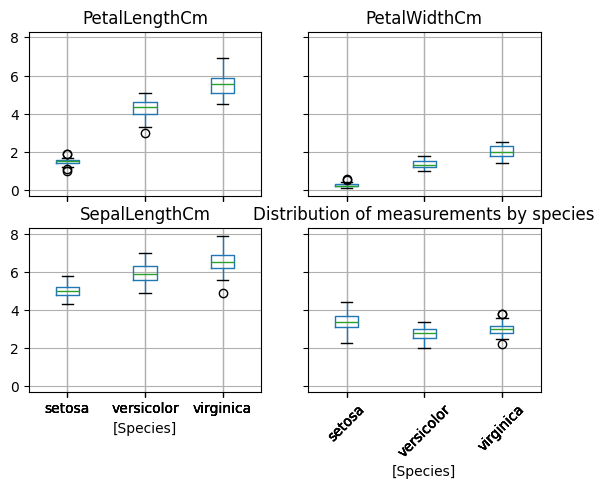

In [44]:
plt.figure(figsize=(12, 6))
data_frame.boxplot(by='Species')
plt.title('Distribution of measurements by species')
plt.suptitle('')
plt.xticks(rotation=45)
plt.show()

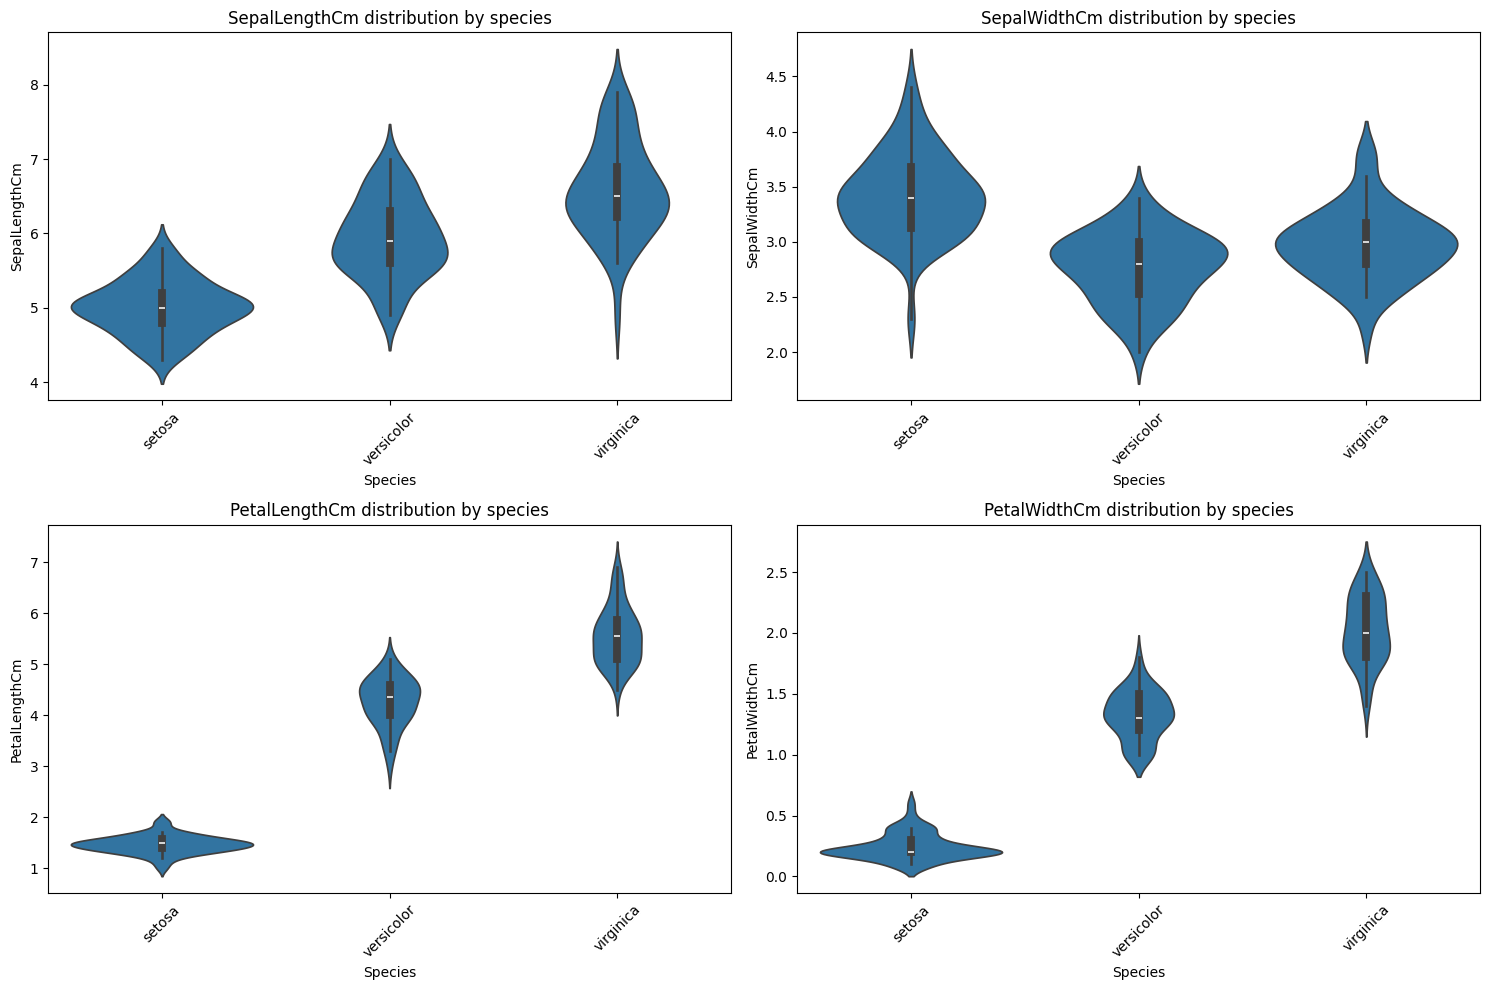

In [46]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']):
    plt.subplot(2, 2, i+1)
    sns.violinplot(data=data_frame, x='Species', y=column)
    plt.title(f'{column} distribution by species')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()